# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from  sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif,chi2

from sklearn.feature_selection import SequentialFeatureSelector

import pickle
from sklearn.pipeline import Pipeline

import warnings
# Ignore the FutureWarning related to is_categorical_dtype
warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")

# Read Data

In [2]:
Training_data=pd.read_csv("DataSet/train - train.csv")
test_data=pd.read_csv("DataSet/test - test.csv")

In [3]:
Training_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Showing Some statistic

In [6]:
Training_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
Training_data.shape

(2000, 21)

# Data Preparing

## Check for duplicate rows

In [8]:
Training_data.duplicated().sum()

0

## Check Missing Values

In [9]:
Training_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Drop Rows that contain Missing values

In [10]:
Training_data.dropna(inplace=True)

In [11]:
Training_data.shape

(1991, 21)

In [12]:
Training_data['four_g'] = Training_data['four_g'].astype('int64')

## Show the unique values for the category columns

In [13]:
Training_data["price_range"].value_counts()

price_range
2    499
0    499
3    497
1    496
Name: count, dtype: int64

In [14]:
Training_data['n_cores'].value_counts()

n_cores
4.0    272
7.0    258
8.0    256
2.0    247
3.0    246
5.0    244
1.0    242
6.0    226
Name: count, dtype: int64

In [15]:
Training_data['three_g'].value_counts()

three_g
1    1515
0     476
Name: count, dtype: int64

## Checking the imbalance in the data

In [16]:
price_range_count=Training_data.groupby('price_range').size().reset_index()

price_range_count=price_range_count.rename(columns = {0:'count'})

price_range_count_fig=px.pie(price_range_count,names='price_range',values='count',title=f'Unique values of Cover Type - '
                ,color_discrete_sequence=px.colors.sequential.RdBu ,hole=0.2)

price_range_count_fig.show()

## Plot histograms for each feature to visualize their distributions

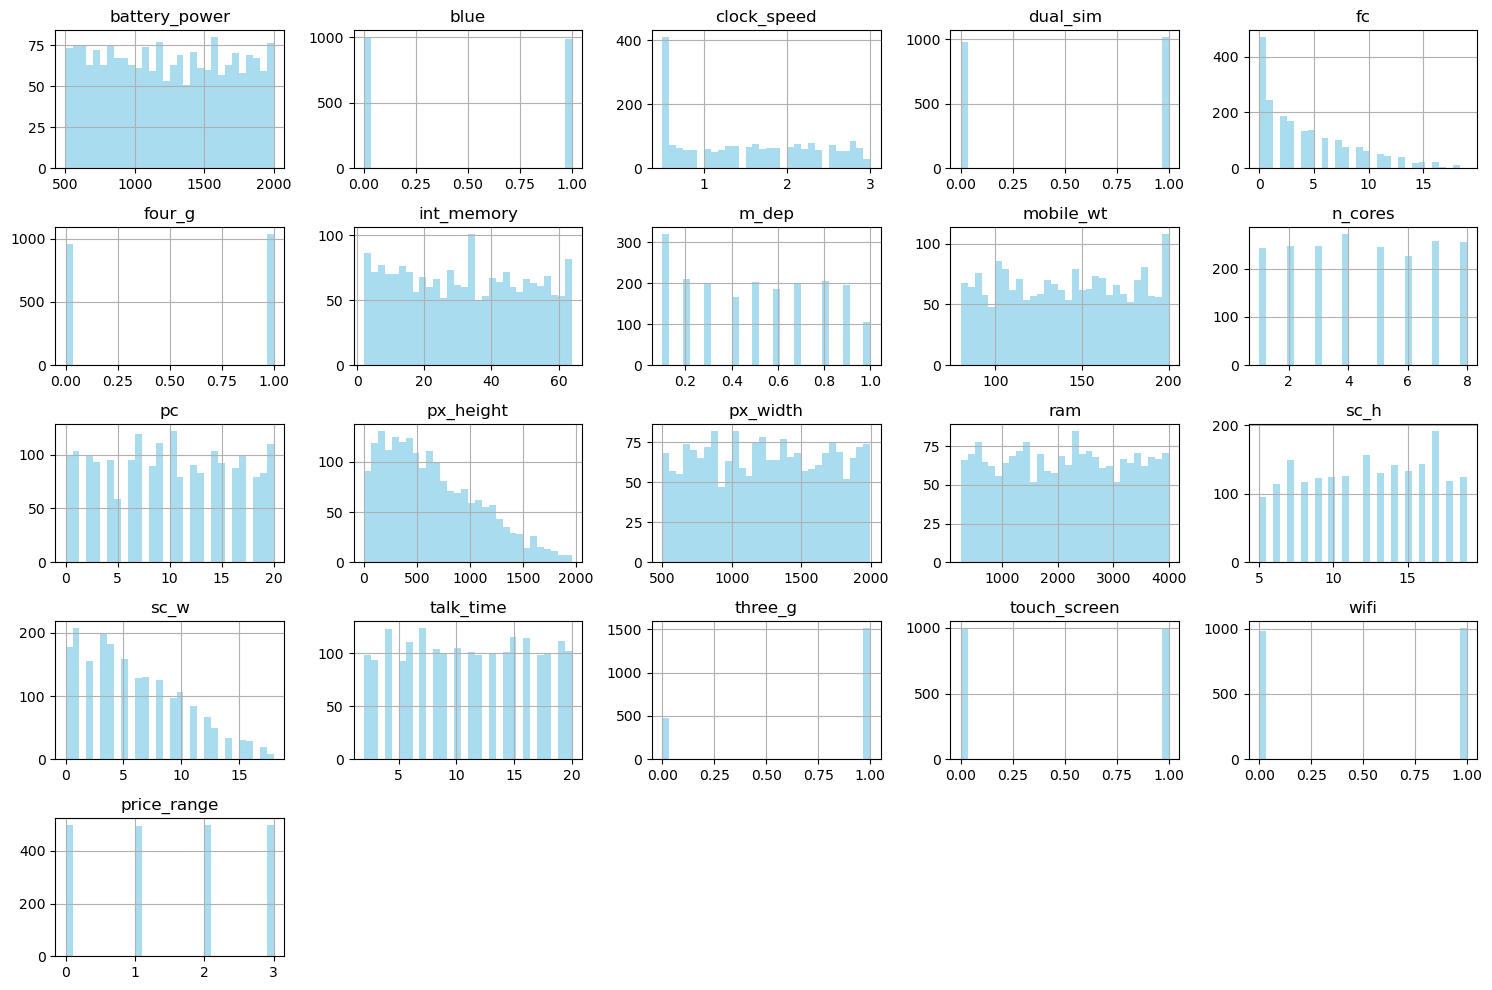

In [17]:
Training_data.hist(bins=30, color='skyblue', alpha=0.7,figsize=(15, 10))
plt.tight_layout()

plt.show()

### Conclusion:
* We have 8 categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi
* We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w

* we noticed that px_height (Pixel Resolution Height) and sc_w (Screen Width of mobile in cm), many values close to zero are observed, which seem like noise 

## look at px_height  and sc_w feature distributions again

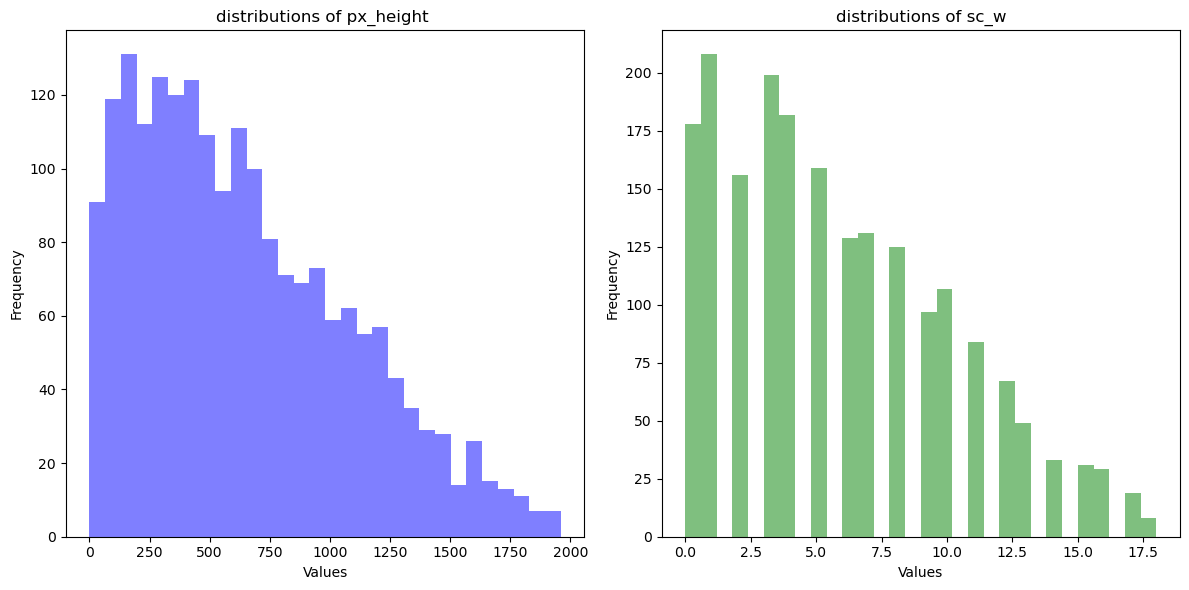

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for column1 in the first subplot
axs[0].hist(Training_data['px_height'], bins=30, alpha=0.5, color='blue')
axs[0].set_title('distributions of px_height ')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for column2 in the second subplot
axs[1].hist(Training_data['sc_w'], bins=30, alpha=0.5, color='green')
axs[1].set_title('distributions of sc_w')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Conclusion
* The data for "Pixel Resolution Height" (px_height) and "Screen Width" (sc_w) in mobile devices often includes numerous instances where the values are zero or very close to zero. These instances appear as noise in the data.

* I intend to implement classification models that are less sensitive to noise and outliers.

## Detect Noise values in px_height and sc_w

In [19]:
sc_w_NoiseValues = Training_data[Training_data['sc_w'] < 2].index

px_height_NoiseValues= Training_data[Training_data['px_height'] < 5].index

print('The number of noise values for sc_w: ', len(sc_w_NoiseValues))
print('The number of noise values for px_height: ', len(px_height_NoiseValues))

The number of noise values for sc_w:  386
The number of noise values for px_height:  9


## Plot Box Plot For each numeric feature

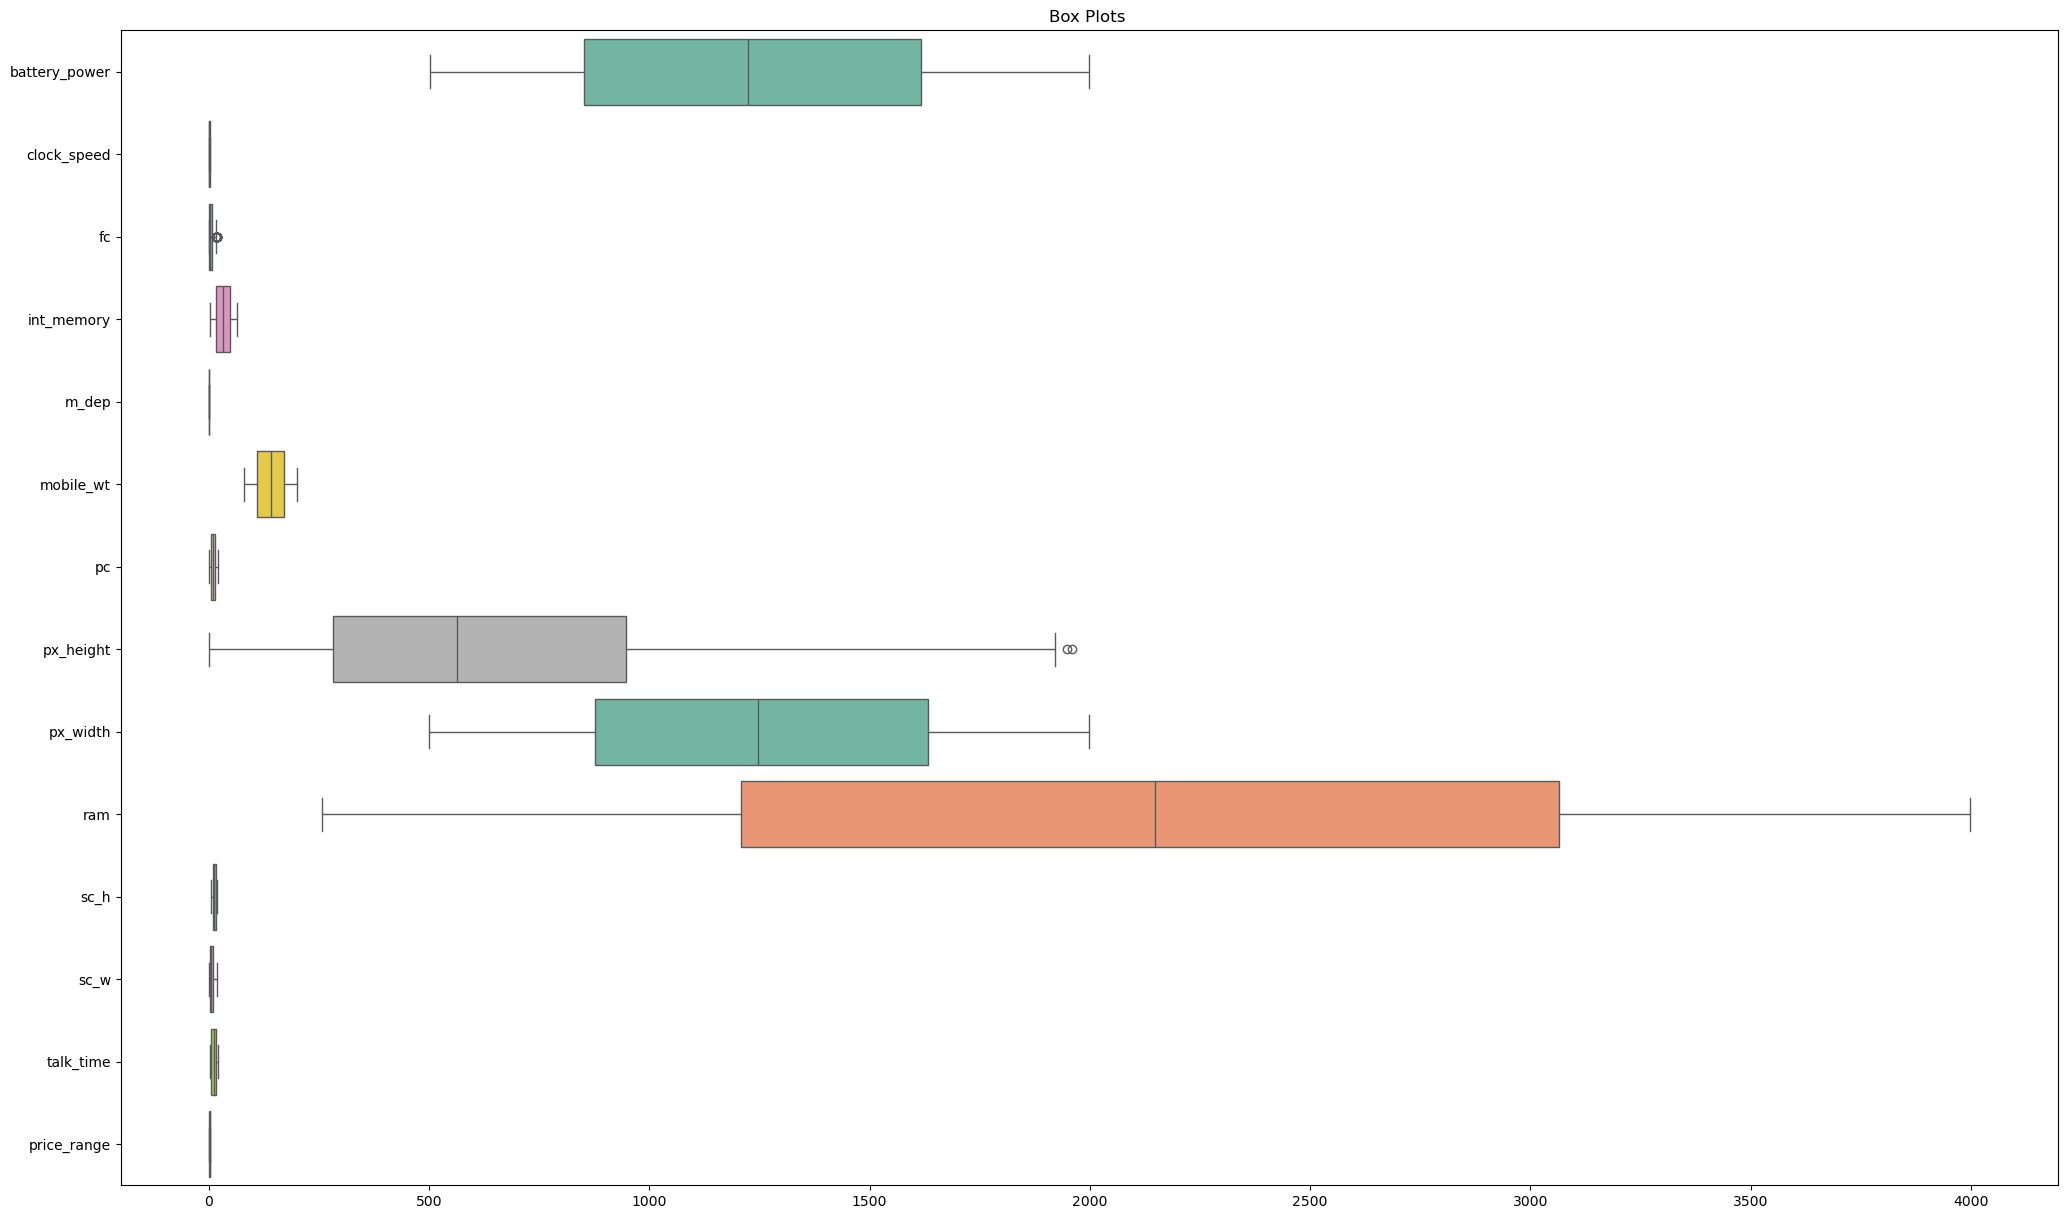

In [20]:
exclude_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','n_cores']

selected_columns = Training_data.drop(exclude_cols, axis=1)


plt.figure(figsize=(25, 15))
sns.boxplot(data=selected_columns, orient="h", palette="Set2")
plt.title("Box Plots ")
plt.show()

# Model Training

## Define the Features and Target variable

In [21]:
X = Training_data.drop(columns=['price_range'])  
y = Training_data['price_range']  

## Split the data

In [22]:

X_train,X_val,Y_train,Y_val=train_test_split(X,y,test_size=0.1, random_state=42,stratify=y)

In [23]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1898,684,1,0.9,1,3.0,1,63.0,1.0,157.0,5.0,9.0,159.0,1738.0,3756.0,17.0,5.0,12,1,1,1
280,1733,1,2.8,0,3.0,1,36.0,1.0,119.0,6.0,20.0,357.0,527.0,3576.0,17.0,16.0,9,1,0,0
915,1265,0,0.6,1,4.0,1,49.0,0.5,90.0,1.0,5.0,275.0,687.0,1518.0,16.0,11.0,8,1,0,1
846,1489,0,2.4,1,8.0,0,32.0,0.6,200.0,1.0,16.0,172.0,812.0,776.0,7.0,6.0,8,0,0,0
1629,1232,0,1.2,0,12.0,0,30.0,0.9,131.0,6.0,14.0,625.0,761.0,1656.0,8.0,4.0,15,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1796,0,1.6,1,5.0,0,7.0,0.1,101.0,4.0,6.0,667.0,798.0,1642.0,9.0,4.0,3,0,1,1
784,1892,1,0.7,0,5.0,0,47.0,0.4,110.0,4.0,10.0,1399.0,1564.0,2172.0,17.0,14.0,3,1,1,1
218,1886,0,0.5,0,0.0,1,24.0,0.4,112.0,3.0,1.0,809.0,1958.0,1179.0,16.0,7.0,20,1,0,1
1604,1179,1,0.8,0,1.0,0,5.0,0.9,154.0,5.0,17.0,913.0,1429.0,543.0,8.0,7.0,18,0,0,1


In [24]:
X_val.shape

(200, 20)

In [77]:
X_val

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1667,1967,0,0.5,0,0.0,1,46.0,0.6,199.0,1.0,7.0,518.0,1374.0,1567.0,15.0,2.0,7,1,1,0
1618,502,0,0.8,0,7.0,0,52.0,1.0,82.0,6.0,8.0,281.0,1159.0,2666.0,5.0,4.0,20,1,1,0
557,1519,0,2.1,0,0.0,0,32.0,0.7,200.0,1.0,10.0,168.0,1239.0,2912.0,11.0,10.0,15,1,1,0
631,1063,1,1.1,0,0.0,1,26.0,0.8,101.0,5.0,2.0,1208.0,1232.0,3809.0,17.0,16.0,5,1,0,1
1529,1831,1,2.2,1,4.0,0,55.0,1.0,189.0,8.0,9.0,1693.0,1790.0,1133.0,14.0,3.0,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,964,0,2.0,0,0.0,1,22.0,0.7,86.0,8.0,0.0,225.0,1234.0,2577.0,17.0,16.0,5,1,1,0
625,501,0,2.3,0,12.0,1,54.0,0.3,131.0,4.0,19.0,504.0,1089.0,2346.0,13.0,12.0,2,1,0,1
16,838,0,0.5,0,1.0,1,13.0,0.1,196.0,8.0,4.0,984.0,1850.0,3554.0,10.0,9.0,19,1,0,1
380,1874,1,2.7,1,10.0,0,8.0,0.9,166.0,7.0,13.0,964.0,1233.0,1246.0,8.0,1.0,2,0,0,1


In [78]:
Y_val

1667    1
1618    2
557     2
631     3
1529    1
       ..
1583    2
625     1
16      3
380     1
905     3
Name: price_range, Length: 200, dtype: int64

## Normalization

### Select the numeric feature

In [25]:
numeric_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
                'sc_w','talk_time']

In [26]:
X_train_scaled=X_train.copy()
X_val_scaled=X_val.copy()

In [27]:
scaler = StandardScaler()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val_scaled[numeric_cols])

In [28]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1898,684,1,0.9,1,3.0,1,63.0,1.0,157.0,5.0,9.0,159.0,1738.0,3756.0,17.0,5.0,12,1,1,1
280,1733,1,2.8,0,3.0,1,36.0,1.0,119.0,6.0,20.0,357.0,527.0,3576.0,17.0,16.0,9,1,0,0
915,1265,0,0.6,1,4.0,1,49.0,0.5,90.0,1.0,5.0,275.0,687.0,1518.0,16.0,11.0,8,1,0,1
846,1489,0,2.4,1,8.0,0,32.0,0.6,200.0,1.0,16.0,172.0,812.0,776.0,7.0,6.0,8,0,0,0
1629,1232,0,1.2,0,12.0,0,30.0,0.9,131.0,6.0,14.0,625.0,761.0,1656.0,8.0,4.0,15,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1796,0,1.6,1,5.0,0,7.0,0.1,101.0,4.0,6.0,667.0,798.0,1642.0,9.0,4.0,3,0,1,1
784,1892,1,0.7,0,5.0,0,47.0,0.4,110.0,4.0,10.0,1399.0,1564.0,2172.0,17.0,14.0,3,1,1,1
218,1886,0,0.5,0,0.0,1,24.0,0.4,112.0,3.0,1.0,809.0,1958.0,1179.0,16.0,7.0,20,1,0,1
1604,1179,1,0.8,0,1.0,0,5.0,0.9,154.0,5.0,17.0,913.0,1429.0,543.0,8.0,7.0,18,0,0,1


In [29]:
X_train_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1898,-1.258979,1,-0.759298,1,-0.302629,1,1.696994,1.711253,0.485801,5.0,-0.147868,-1.087911,1.135426,1.499310,1.116953,-0.183104,0.193493,1,1,1
280,1.120083,1,1.587277,0,-0.302629,1,0.210614,1.711253,-0.593478,6.0,1.677418,-0.643955,-1.676224,1.333821,1.116953,2.355487,-0.352536,1,0,0
915,0.058690,0,-1.129809,1,-0.071298,1,0.926278,-0.019325,-1.417138,1.0,-0.811609,-0.827815,-1.304743,-0.558269,0.879368,1.201582,-0.534545,1,0,1
846,0.566707,0,1.093262,1,0.854026,0,-0.009590,0.326790,1.707090,1.0,1.013677,-1.058762,-1.014523,-1.240450,-1.258893,0.047677,-0.534545,0,0,0
1629,-0.016152,0,-0.388786,0,1.779350,0,-0.119692,1.365137,-0.252653,6.0,0.681807,-0.043044,-1.132933,-0.431394,-1.021309,-0.413885,0.739522,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1.262963,0,0.105230,1,0.160033,0,-1.385867,-1.403788,-1.104715,4.0,-0.645674,0.051129,-1.047028,-0.444265,-0.783724,-0.413885,-1.444593,0,1,1
784,1.480685,1,-1.006305,0,0.160033,0,0.816176,-0.365441,-0.849097,4.0,0.018067,1.692422,0.731440,0.043008,1.116953,1.893925,-1.444593,1,1,1
218,1.467077,0,-1.253313,0,-0.996622,1,-0.449999,-0.365441,-0.792293,3.0,-1.475349,0.369522,1.646213,-0.869939,0.879368,0.278458,1.649570,1,0,1
1604,-0.136352,1,-0.882802,0,-0.765291,0,-1.495970,1.365137,0.400595,5.0,1.179612,0.602711,0.418002,-1.454667,-1.021309,0.278458,1.285551,0,0,1


## Base Models

* Before Applying feature Selection

In [30]:
def evaluating (y_true,y_pred,title):
    precision_per_class = precision_score(y_true, y_pred, average='macro')
    recall_per_class = recall_score(y_true, y_pred, average='macro')
    f1_per_class = f1_score(y_true, y_pred, average='macro')
    accuracy_per_class= accuracy_score(y_true, y_pred)

    print(f"Macro-Averaged Precision for {title} : {precision_per_class:.5f}")
    print(f"Macro-Averaged Recall for {title}    : {recall_per_class:.5f}")
    print(f"Macro-Averaged F1-Score for {title}  : {f1_per_class:.5f}")
    print(f"Accuracy for {title}                 : {accuracy_per_class:.5f}")

## Function conf_matrix
* To preview the confusion matrix and classification report

In [31]:
def conf_matrix(x, y, title, show_report=False):
    cm = confusion_matrix(x, y)
    plt.figure(figsize=(6, 4))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False)
    plt.title(f'Confusion Matrix - {title} Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    if not show_report:
        print("Accuracy: ", accuracy_score(x, y))

    if show_report:
        report = classification_report(x, y)
        print("Classification Report:")
        print(report)
        plt.show()
    return f1_score(x, y, average='macro')

## Model 1: Gaussian Naive Bayes 

### Validation Data

In [32]:
NB_model=GaussianNB()
NB_model.fit(X_train_scaled, Y_train)
Gaussian_validation_predictions = NB_model.predict(X_val_scaled)
evaluating(Y_val,Gaussian_validation_predictions,"Gaussian Naive Bayes Validation")


Macro-Averaged Precision for Gaussian Naive Bayes Validation : 0.83243
Macro-Averaged Recall for Gaussian Naive Bayes Validation    : 0.82500
Macro-Averaged F1-Score for Gaussian Naive Bayes Validation  : 0.82659
Accuracy for Gaussian Naive Bayes Validation                 : 0.82500


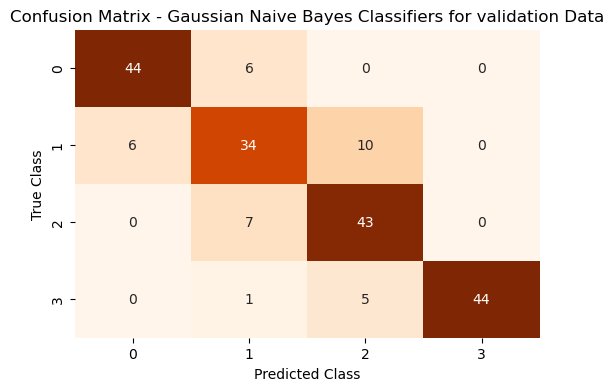

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.71      0.68      0.69        50
           2       0.74      0.86      0.80        50
           3       1.00      0.88      0.94        50

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.83       200
weighted avg       0.83      0.82      0.83       200



In [33]:
nb_baseline_validation= conf_matrix(Y_val,Gaussian_validation_predictions,"Gaussian Naive Bayes Classifiers for validation",True)

### Train Data

In [34]:
Gaussian_Train_predictions = NB_model.predict(X_train_scaled)
evaluating(Y_train,Gaussian_Train_predictions,"Gaussian Naive Bayes Train")

Macro-Averaged Precision for Gaussian Naive Bayes Train : 0.81937
Macro-Averaged Recall for Gaussian Naive Bayes Train    : 0.81849
Macro-Averaged F1-Score for Gaussian Naive Bayes Train  : 0.81890
Accuracy for Gaussian Naive Bayes Train                 : 0.81854


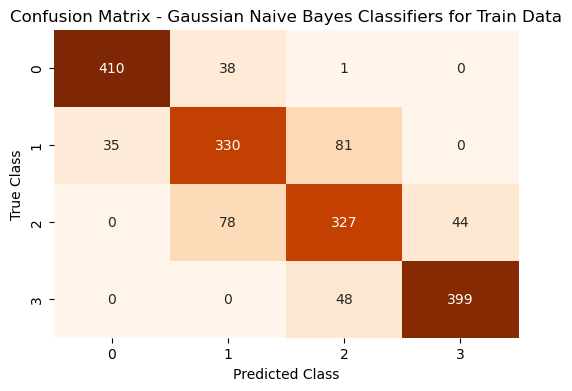

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       449
           1       0.74      0.74      0.74       446
           2       0.72      0.73      0.72       449
           3       0.90      0.89      0.90       447

    accuracy                           0.82      1791
   macro avg       0.82      0.82      0.82      1791
weighted avg       0.82      0.82      0.82      1791



In [35]:
nb_baseline_Train= conf_matrix(Y_train,Gaussian_Train_predictions,"Gaussian Naive Bayes Classifiers for Train",True)

## Model 2: Decision Tree Classifier

### Validation Data

In [36]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train_scaled, Y_train)
y_validation_pred_DT = dt.predict(X_val_scaled)
evaluating(Y_val,y_validation_pred_DT,"Decision Tree Validation")

Macro-Averaged Precision for Decision Tree Validation : 0.88499
Macro-Averaged Recall for Decision Tree Validation    : 0.88500
Macro-Averaged F1-Score for Decision Tree Validation  : 0.88462
Accuracy for Decision Tree Validation                 : 0.88500


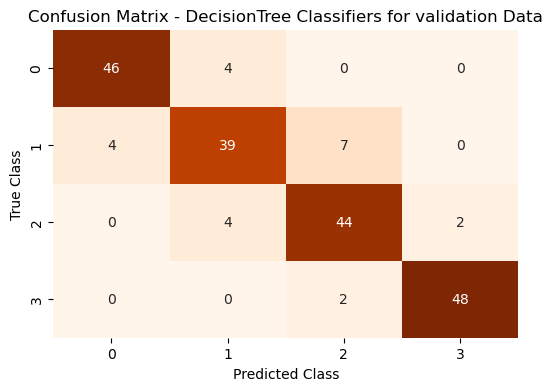

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.83      0.78      0.80        50
           2       0.83      0.88      0.85        50
           3       0.96      0.96      0.96        50

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.88      0.89      0.88       200



In [37]:
DT_baseline_validation= conf_matrix(Y_val,y_validation_pred_DT,"DecisionTree Classifiers for validation",True)

### Train Data

In [38]:
y_Train_pred_DT = dt.predict(X_train_scaled)
evaluating(Y_train,y_Train_pred_DT,"Decision Tree Train")

Macro-Averaged Precision for Decision Tree Train : 1.00000
Macro-Averaged Recall for Decision Tree Train    : 1.00000
Macro-Averaged F1-Score for Decision Tree Train  : 1.00000
Accuracy for Decision Tree Train                 : 1.00000


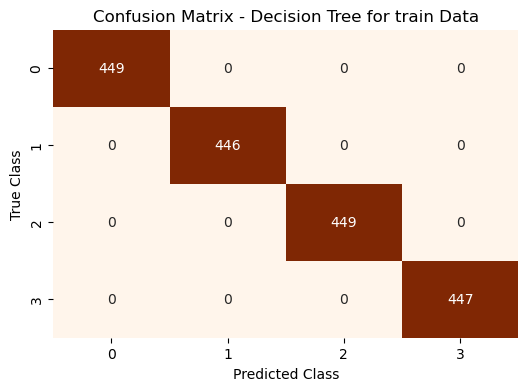

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00       449
           3       1.00      1.00      1.00       447

    accuracy                           1.00      1791
   macro avg       1.00      1.00      1.00      1791
weighted avg       1.00      1.00      1.00      1791



In [39]:
DT_baseline_tain= conf_matrix(Y_train,y_Train_pred_DT,"Decision Tree for train",True)

## Model 3: Random Forest Classifier

### Validation Data

In [40]:
rf_model = RandomForestClassifier(min_samples_leaf= 37
                              ,max_depth=4, n_estimators=100, random_state=42)
# rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, Y_train)
y_pred_Validation_rf = rf_model.predict(X_val_scaled)
evaluating(Y_val,y_pred_Validation_rf,"Random Forest Validation")

Macro-Averaged Precision for Random Forest Validation : 0.81034
Macro-Averaged Recall for Random Forest Validation    : 0.81500
Macro-Averaged F1-Score for Random Forest Validation  : 0.81043
Accuracy for Random Forest Validation                 : 0.81500


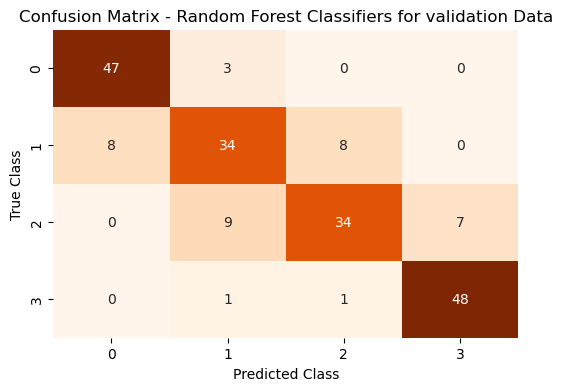

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90        50
           1       0.72      0.68      0.70        50
           2       0.79      0.68      0.73        50
           3       0.87      0.96      0.91        50

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.81      0.81      0.81       200



In [41]:
RF_baseline_validation= conf_matrix(Y_val,y_pred_Validation_rf,"Random Forest Classifiers for validation",True)

### Train Data

In [42]:
y_pred_Train_rf = rf_model.predict(X_train_scaled)
evaluating(Y_train,y_pred_Train_rf,"Random Fores Train")

Macro-Averaged Precision for Random Fores Train : 0.86196
Macro-Averaged Recall for Random Fores Train    : 0.86212
Macro-Averaged F1-Score for Random Fores Train  : 0.86020
Accuracy for Random Fores Train                 : 0.86209


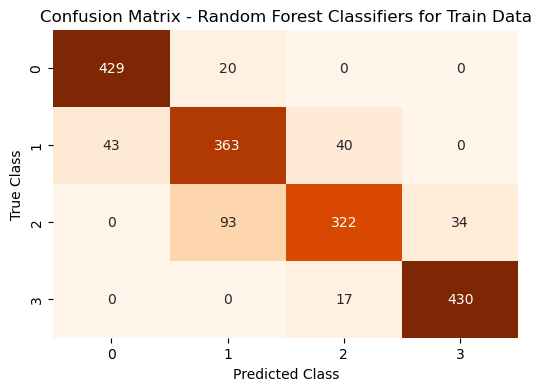

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       449
           1       0.76      0.81      0.79       446
           2       0.85      0.72      0.78       449
           3       0.93      0.96      0.94       447

    accuracy                           0.86      1791
   macro avg       0.86      0.86      0.86      1791
weighted avg       0.86      0.86      0.86      1791



In [43]:
RF_baseline_Train= conf_matrix(Y_train,y_pred_Train_rf,"Random Forest Classifiers for Train",True)

## Model 4: SVM

### Validation Data

In [44]:
svm = SVC(kernel='rbf',random_state=42)
svm.fit(X_train_scaled, Y_train)

y_pred_validation_svm = svm.predict(X_val_scaled)
evaluating(Y_val,y_pred_validation_svm,"SVM Validation")

Macro-Averaged Precision for SVM Validation : 0.90524
Macro-Averaged Recall for SVM Validation    : 0.90500
Macro-Averaged F1-Score for SVM Validation  : 0.90480
Accuracy for SVM Validation                 : 0.90500


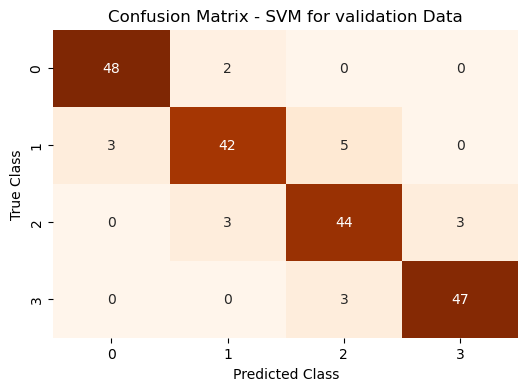

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.89      0.84      0.87        50
           2       0.85      0.88      0.86        50
           3       0.94      0.94      0.94        50

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [45]:
SVM_baseline_validation= conf_matrix(Y_val,y_pred_validation_svm,"SVM for validation",True)

### Train Data

In [46]:
y_pred_TRain_svm = svm.predict(X_train_scaled)
evaluating(Y_train,y_pred_TRain_svm,"SVM Train")

Macro-Averaged Precision for SVM Train : 0.95835
Macro-Averaged Recall for SVM Train    : 0.95811
Macro-Averaged F1-Score for SVM Train  : 0.95819
Accuracy for SVM Train                 : 0.95812


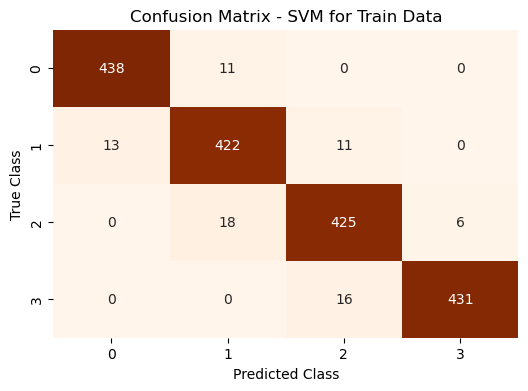

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       449
           1       0.94      0.95      0.94       446
           2       0.94      0.95      0.94       449
           3       0.99      0.96      0.98       447

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791



In [47]:
SVM_baseline_Train= conf_matrix(Y_train,y_pred_TRain_svm,"SVM for Train",True)

## Conclusion

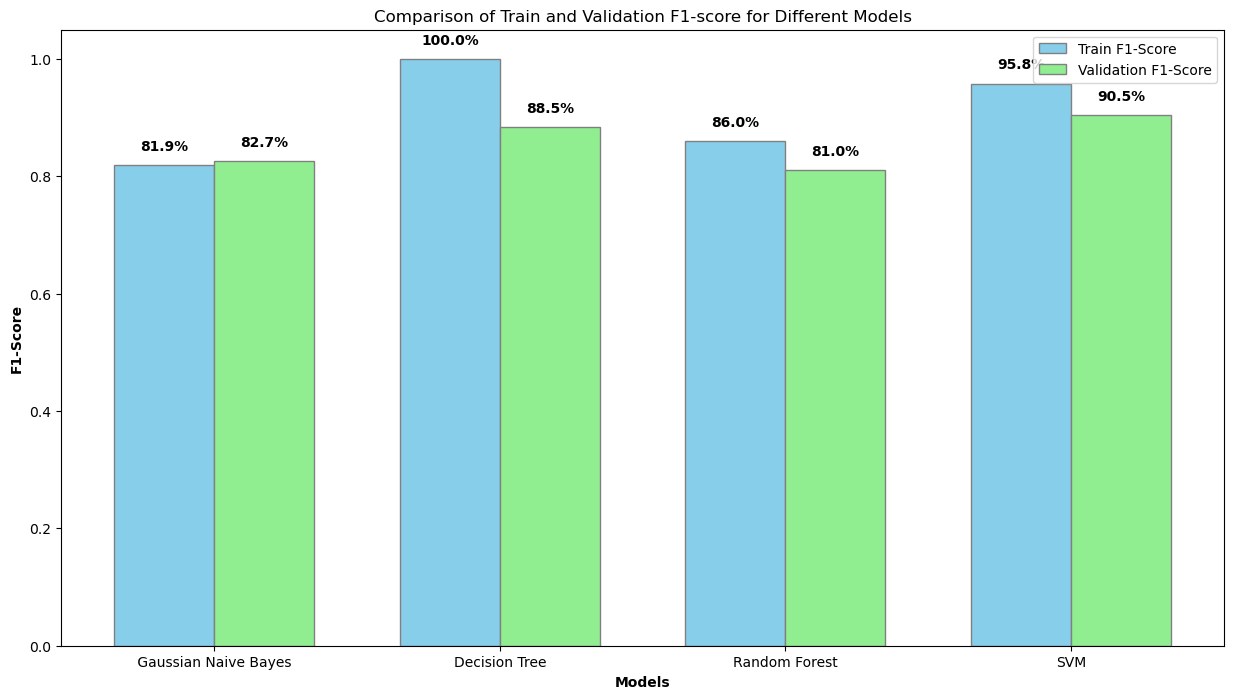

In [48]:
import matplotlib.pyplot as plt

# Sample data
models = [' Gaussian Naive Bayes ', 'Decision Tree', 'Random Forest', 'SVM']
train_accuracy = [nb_baseline_Train, DT_baseline_tain, RF_baseline_Train, SVM_baseline_Train]
val_accuracy = [nb_baseline_validation, DT_baseline_validation, RF_baseline_validation, SVM_baseline_validation]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Set the figure size
plt.figure(figsize=(15, 8))  # Width: 10 inches, Height: 6 inches

# Create the bar plot
plt.bar(r1, train_accuracy, color='skyblue', width=bar_width, edgecolor='grey', label='Train F1-Score')
plt.bar(r2, val_accuracy, color='lightgreen', width=bar_width, edgecolor='grey', label='Validation F1-Score')

# Add accuracy percentages on top of each bar
for i in r1:
    plt.text(i, train_accuracy[i] + 0.02, f'{train_accuracy[i]*100:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')
    plt.text(i + bar_width, val_accuracy[i] + 0.02, f'{val_accuracy[i]*100:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Comparison of Train and Validation F1-score for Different Models')

# Shift the legend to the upper right
plt.legend(loc='upper right')

# Show the plot
plt.show()


### As we can see, all models are overfitting because the F1-Score of the training set is higher than the F1-Score of the validation set, except for Gaussian Naive Bayes, which is a robust model against noise.

# Feature Filtering/Selection

## Try Naive Bayes Model with the feature Selection method

## Mutual Information (mutual info)

In [49]:
def select_feature(X_train, y_train,X_validation , FSM):
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    # X_test_new = fs.transform(X_test)
    X_validation_new = fs.transform(X_validation)
    
    feature_indices = fs.get_support(indices=True)
   

    return X_train_new,X_validation_new,feature_indices

In [50]:
import numpy as np
np.random.seed(42) 

acc_dict_NB_validation = {}
# acc_dict_VAR_NB = {}
feature_indices_dict={}
for k in range(1, len(X_train.columns) + 1):

    # Filter method: Information Gain
    fsm = SelectKBest(score_func=mutual_info_classif, k=k)
    
    X_train_new_SBest,X_validation_new_SBest,feature_indices = select_feature(X_train, Y_train, X_val, fsm)
    feature_indices_dict[k]=feature_indices
    

     # Naive Bayes classifier
    nb_classifier = GaussianNB()
    
    nb_classifier.fit(X_train_new_SBest, Y_train)
    y_validation_pred_DT = nb_classifier.predict(X_validation_new_SBest)
    
    acc_dict_NB_validation[k]=accuracy_score(Y_val,y_validation_pred_DT)
    

In [51]:
def Draw_plots(acc_list,baseline_accuracy, Title=None):
    fig = plt.figure()  # Create a new figure
    plt.plot(*zip(*sorted(acc_list.items())))
    plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label=f'Baseline Accuracy {baseline_accuracy:.3f}')
    plt.legend()
    # Title = "Feature Selection with Information Gain Method"
    plt.title(Title, fontsize=16)
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.show()
    print("Maximum accuracy:", max(acc_list.values()))
    print("Best number of features:", max(acc_list, key=acc_list.get))
    plt.show()
    return   max(acc_list, key=acc_list.get)
    # plt.close(fig)

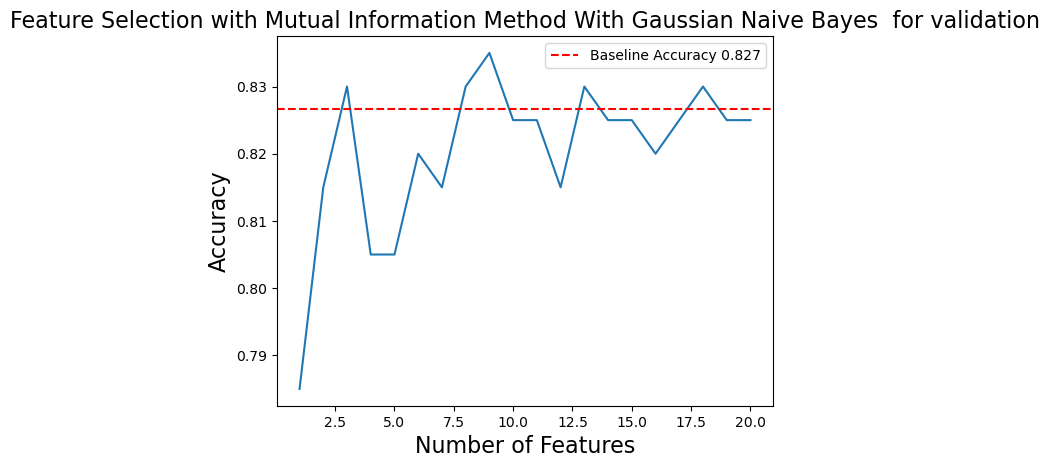

Maximum accuracy: 0.835
Best number of features: 9


In [52]:
Max_NB_val=Draw_plots(acc_dict_NB_validation,nb_baseline_validation,"Feature Selection with Mutual Information Method With Gaussian Naive Bayes  for validation")

## Feature selection wrapper based approch

In [53]:
def SequentialFeature(model, X_train, y_train, n_features_to_select,forward="forward"):
    sfs = SequentialFeatureSelector(model,
                                    n_features_to_select=n_features_to_select,
                                    direction=forward,
#                                     floating=False,
#                                     verbose=0,
                                    scoring='accuracy' )
    sfs.fit(X_train, y_train)
    selected_features_indices = sfs.get_support(indices=True)
#     selected_feature_names = list(sfs.k_feature_names_)
    return selected_features_indices

In [54]:
def wrapper_feature_selection(Model,x___train,y_train,X____test,y_test):
    
    selected_feature_names_dict_A = {}  
    accuracies_model_A_test = {}
    accuracies_model_A_val = {}

    
    
    for k in range(1, 20):
        selected_features_indices_A = SequentialFeature(Model, x___train, y_train, k,forward="forward")
        X_train_selected_A = x___train.iloc[:, selected_features_indices_A]
        X_test_selected_A = X____test.iloc[:, selected_features_indices_A]
#         X_validation_selected_A = X_validation.iloc[:, selected_features_indices_A]
    
        selected_feature_names_dict_A[k]=selected_features_indices_A
        
        Model.fit(X_train_selected_A, y_train)
        predictions_test_A = Model.predict(X_test_selected_A)
#         predictions_validation_A= Model.predict(X_validation_selected_A)
        
        accuracies_model_A_test[k]=accuracy_score(y_test, predictions_test_A)
#         accuracies_model_A_val[k]=accuracy_score(y_validation, predictions_validation_A
      
    

    return accuracies_model_A_test,selected_feature_names_dict_A

In [55]:
accuracies_model_NB,selected_feature_names_dict_NB=wrapper_feature_selection(GaussianNB(),X_train,Y_train,X_val,Y_val)

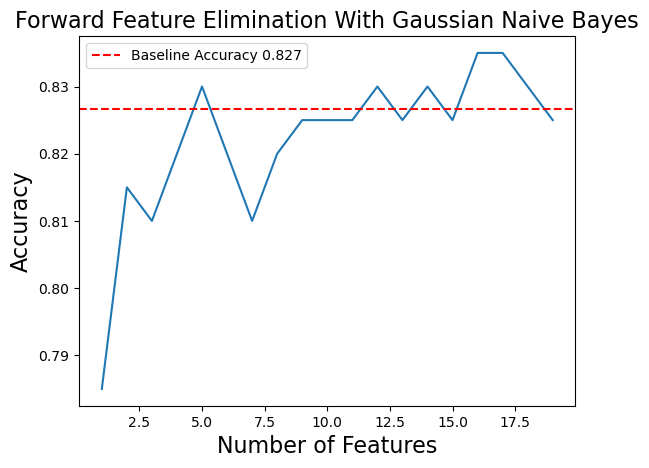

Maximum accuracy: 0.835
Best number of features: 16


16

In [56]:
Draw_plots(accuracies_model_NB,nb_baseline_validation,"Forward Feature Elimination With Gaussian Naive Bayes")

## Now, the best performance is using Feature selection filter based approach with Gaussian Naive Bayes

## Gaussian Naive Bayes Featuer indices with test set

In [57]:
Max_NB_val

9

## Function " find_list_with_length "
* this is user defined function whice use to select the best feature from data after get the best indices from Feature selection •


In [58]:
def find_list_with_length(feature_indices_dict,desired_length,Data):
   
    new_features = feature_indices_dict.get(desired_length, None)
    print(new_features)
    if new_features is not None:
        new_X_train = Data.iloc[:, new_features]
        return new_X_train
    else:
        # Handle the case when the desired_length is not found in the dictionary
        print(f"No list with length {desired_length} found in the dictionary.")
        return None
    

## Run find_list_with_length to get New X-train and New X_val

In [59]:
X_train_new=find_list_with_length(feature_indices_dict,Max_NB_val,X_train)

X_Validation_new=find_list_with_length(feature_indices_dict,Max_NB_val,X_val)

X_Validation_new

[ 0  1  4  5  6 11 12 13 16]
[ 0  1  4  5  6 11 12 13 16]


,battery_power,blue,fc,four_g,int_memory,px_height,px_width,ram,talk_time
1667,1967,0,0.0,1,46.0,518.0,1374.0,1567.0,7
1618,502,0,7.0,0,52.0,281.0,1159.0,2666.0,20
557,1519,0,0.0,0,32.0,168.0,1239.0,2912.0,15
631,1063,1,0.0,1,26.0,1208.0,1232.0,3809.0,5
1529,1831,1,4.0,0,55.0,1693.0,1790.0,1133.0,10
...,...,...,...,...,...,...,...,...,...
1583,964,0,0.0,1,22.0,225.0,1234.0,2577.0,5
625,501,0,12.0,1,54.0,504.0,1089.0,2346.0,2
16,838,0,1.0,1,13.0,984.0,1850.0,3554.0,19
380,1874,1,10.0,0,8.0,964.0,1233.0,1246.0,2


## Scale the Selected Feature

In [60]:
new_features = feature_indices_dict.get(Max_NB_val, None)

new_features_data = X_train.iloc[:, new_features]

Selected_feature_saved=new_features_data.columns
Selected_feature_saved.to_list()

['battery_power',
 'blue',
 'fc',
 'four_g',
 'int_memory',
 'px_height',
 'px_width',
 'ram',
 'talk_time']

In [61]:
common_elements = list(set(Selected_feature_saved.to_list()) & set(numeric_cols))
common_elements

['battery_power',
 'fc',
 'talk_time',
 'px_width',
 'ram',
 'px_height',
 'int_memory']

In [62]:
scaler_Selected_Featre = StandardScaler()


X_train_new.loc[:, common_elements] = scaler_Selected_Featre.fit_transform(X_train_new.loc[:, common_elements])
X_Validation_new.loc[:, common_elements] = scaler_Selected_Featre.transform(X_Validation_new.loc[:, common_elements])

In [64]:
X_train_new

,battery_power,blue,fc,four_g,int_memory,px_height,px_width,ram,talk_time
1898,-1.258979,1,-0.302629,1,1.696994,-1.087911,1.135426,1.499310,0.193493
280,1.120083,1,-0.302629,1,0.210614,-0.643955,-1.676224,1.333821,-0.352536
915,0.058690,0,-0.071298,1,0.926278,-0.827815,-1.304743,-0.558269,-0.534545
846,0.566707,0,0.854026,0,-0.009590,-1.058762,-1.014523,-1.240450,-0.534545
1629,-0.016152,0,1.779350,0,-0.119692,-0.043044,-1.132933,-0.431394,0.739522
...,...,...,...,...,...,...,...,...,...
1259,1.262963,0,0.160033,0,-1.385867,0.051129,-1.047028,-0.444265,-1.444593
784,1.480685,1,0.160033,0,0.816176,1.692422,0.731440,0.043008,-1.444593
218,1.467077,0,-0.996622,1,-0.449999,0.369522,1.646213,-0.869939,1.649570
1604,-0.136352,1,-0.765291,0,-1.495970,0.602711,0.418002,-1.454667,1.285551


# Try Gaussian Naive Bayes with the selected Feature for Train and validation set

In [65]:
NB_model_New_feature=GaussianNB()
NB_model_New_feature.fit(X_train_new, Y_train)
Gaussian_validation_predictions_new = NB_model_New_feature.predict(X_Validation_new)
evaluating(Y_val,Gaussian_validation_predictions_new,"Gaussian Naive Bayes Validation")

Macro-Averaged Precision for Gaussian Naive Bayes Validation : 0.84110
Macro-Averaged Recall for Gaussian Naive Bayes Validation    : 0.83500
Macro-Averaged F1-Score for Gaussian Naive Bayes Validation  : 0.83571
Accuracy for Gaussian Naive Bayes Validation                 : 0.83500


In [66]:
Gaussian_Train_predictions_new = NB_model_New_feature.predict(X_train_new)
evaluating(Y_train,Gaussian_Train_predictions_new,"Gaussian Naive Bayes Train")

Macro-Averaged Precision for Gaussian Naive Bayes Train : 0.79787
Macro-Averaged Recall for Gaussian Naive Bayes Train    : 0.79729
Macro-Averaged F1-Score for Gaussian Naive Bayes Train  : 0.79756
Accuracy for Gaussian Naive Bayes Train                 : 0.79732


# Optimize your model:

## Hyperparameter tuning For Gaussian Naive Bayes

In [67]:
nb_classifier = GaussianNB()


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)

grid_search.fit(X_train_new, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_nb = grid_search.best_estimator_
accuracy = best_nb.score(X_Validation_new, Y_val)
print("Accuracy:", accuracy)


Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.835


In [68]:
y_pred_NB = grid_search.predict(X_Validation_new)
f1_NB = f1_score(Y_val, y_pred_NB,average="macro")
print("F1 Score on Test Set (Gaussian Naive): ", f1_NB)

F1 Score on Test Set (Gaussian Naive):  0.8357054764204088


## Conclusion
* Naive Bayes models typically don’t have many hyperparameters to tune; the var_smoothing parameter corresponds to alpha, which controls the amount of regularization.
* However, the performance was not enhanced.

# Create Pipeline with feature selection followed by Scaler followed by the Gaussian Naive classifier

In [72]:
new_features = feature_indices_dict.get(Max_NB_val, None)
new_features

array([ 0,  1,  4,  5,  6, 11, 12, 13, 16], dtype=int64)

In [73]:
new_features_data = X_train.iloc[:, new_features]
new_features_data

,battery_power,blue,fc,four_g,int_memory,px_height,px_width,ram,talk_time
1898,684,1,3.0,1,63.0,159.0,1738.0,3756.0,12
280,1733,1,3.0,1,36.0,357.0,527.0,3576.0,9
915,1265,0,4.0,1,49.0,275.0,687.0,1518.0,8
846,1489,0,8.0,0,32.0,172.0,812.0,776.0,8
1629,1232,0,12.0,0,30.0,625.0,761.0,1656.0,15
...,...,...,...,...,...,...,...,...,...
1259,1796,0,5.0,0,7.0,667.0,798.0,1642.0,3
784,1892,1,5.0,0,47.0,1399.0,1564.0,2172.0,3
218,1886,0,0.0,1,24.0,809.0,1958.0,1179.0,20
1604,1179,1,1.0,0,5.0,913.0,1429.0,543.0,18


In [74]:
Selected_feature_saved=new_features_data.columns
Selected_feature_saved

Index(['battery_power', 'blue', 'fc', 'four_g', 'int_memory', 'px_height',
       'px_width', 'ram', 'talk_time'],
      dtype='object')

In [75]:
pipeline = Pipeline([
    ('selected_features',Selected_feature_saved),
    ('Scaler', scaler_Selected_Featre),
    ('classifier', NB_model_New_feature)
])

In [76]:
with open("pipeline_pickle",'wb') as file:
    pickle.dump(pipeline,file)